<b>Prepare a classification model using Naive Bayes 
for salary data 

<b>Data Description:

<b>age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
train_data = pd.read_csv(r'D:\Excelr Data Science assignment\Naive Bayes\SalaryData_Train.csv')
test_data = pd.read_csv(r'D:\Excelr Data Science assignment\Naive Bayes\SalaryData_Test.csv')

In [3]:
train_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
test_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


<b>EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
print('Train Data Shape : ',train_data.shape)
print('Test Data Shape : ' ,test_data.shape)

Train Data Shape :  (30161, 14)
Test Data Shape :  (15060, 14)


In [8]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

C:\Users\CSC\AppData\Local\Temp\ipykernel_8948\2999810638.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
C:\Users\CSC\AppData\Local\Temp\ipykernel_8948\2999810638.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)
C:\Users\CSC\AppData\Local\Temp\ipykernel_8948\2999810638.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),annot=True)


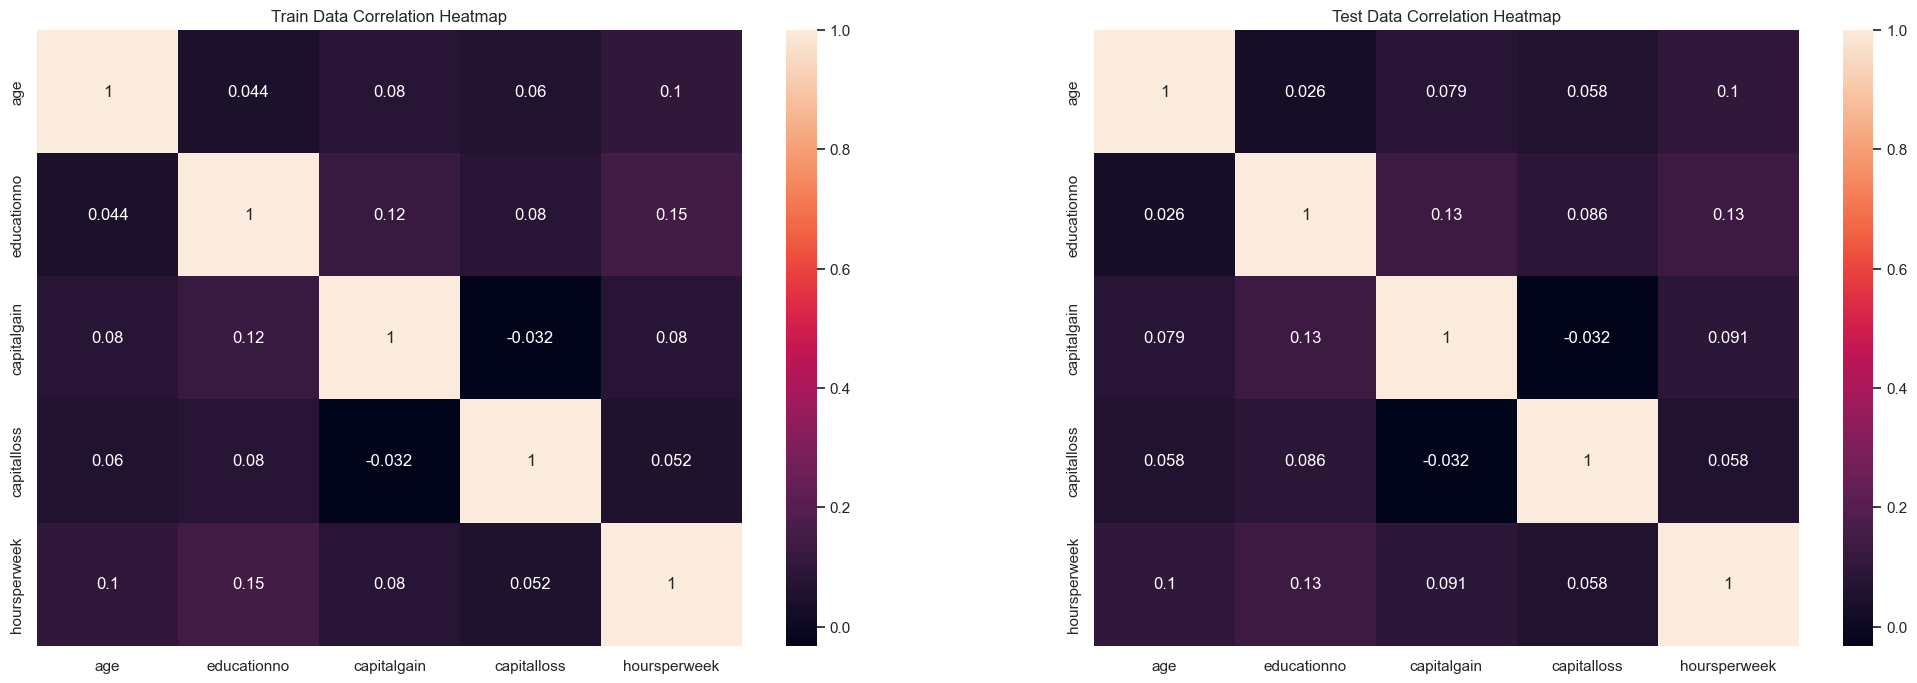

In [10]:
#Correlation Visualization
plt.subplots(figsize=(25,8))
plt.subplot(121)
sns.heatmap(train_data.corr(),annot=True)
plt.title('Train Data Correlation Heatmap')
plt.subplot(122)
sns.heatmap(test_data.corr(),annot=True)
plt.title('Test Data Correlation Heatmap')
plt.show()

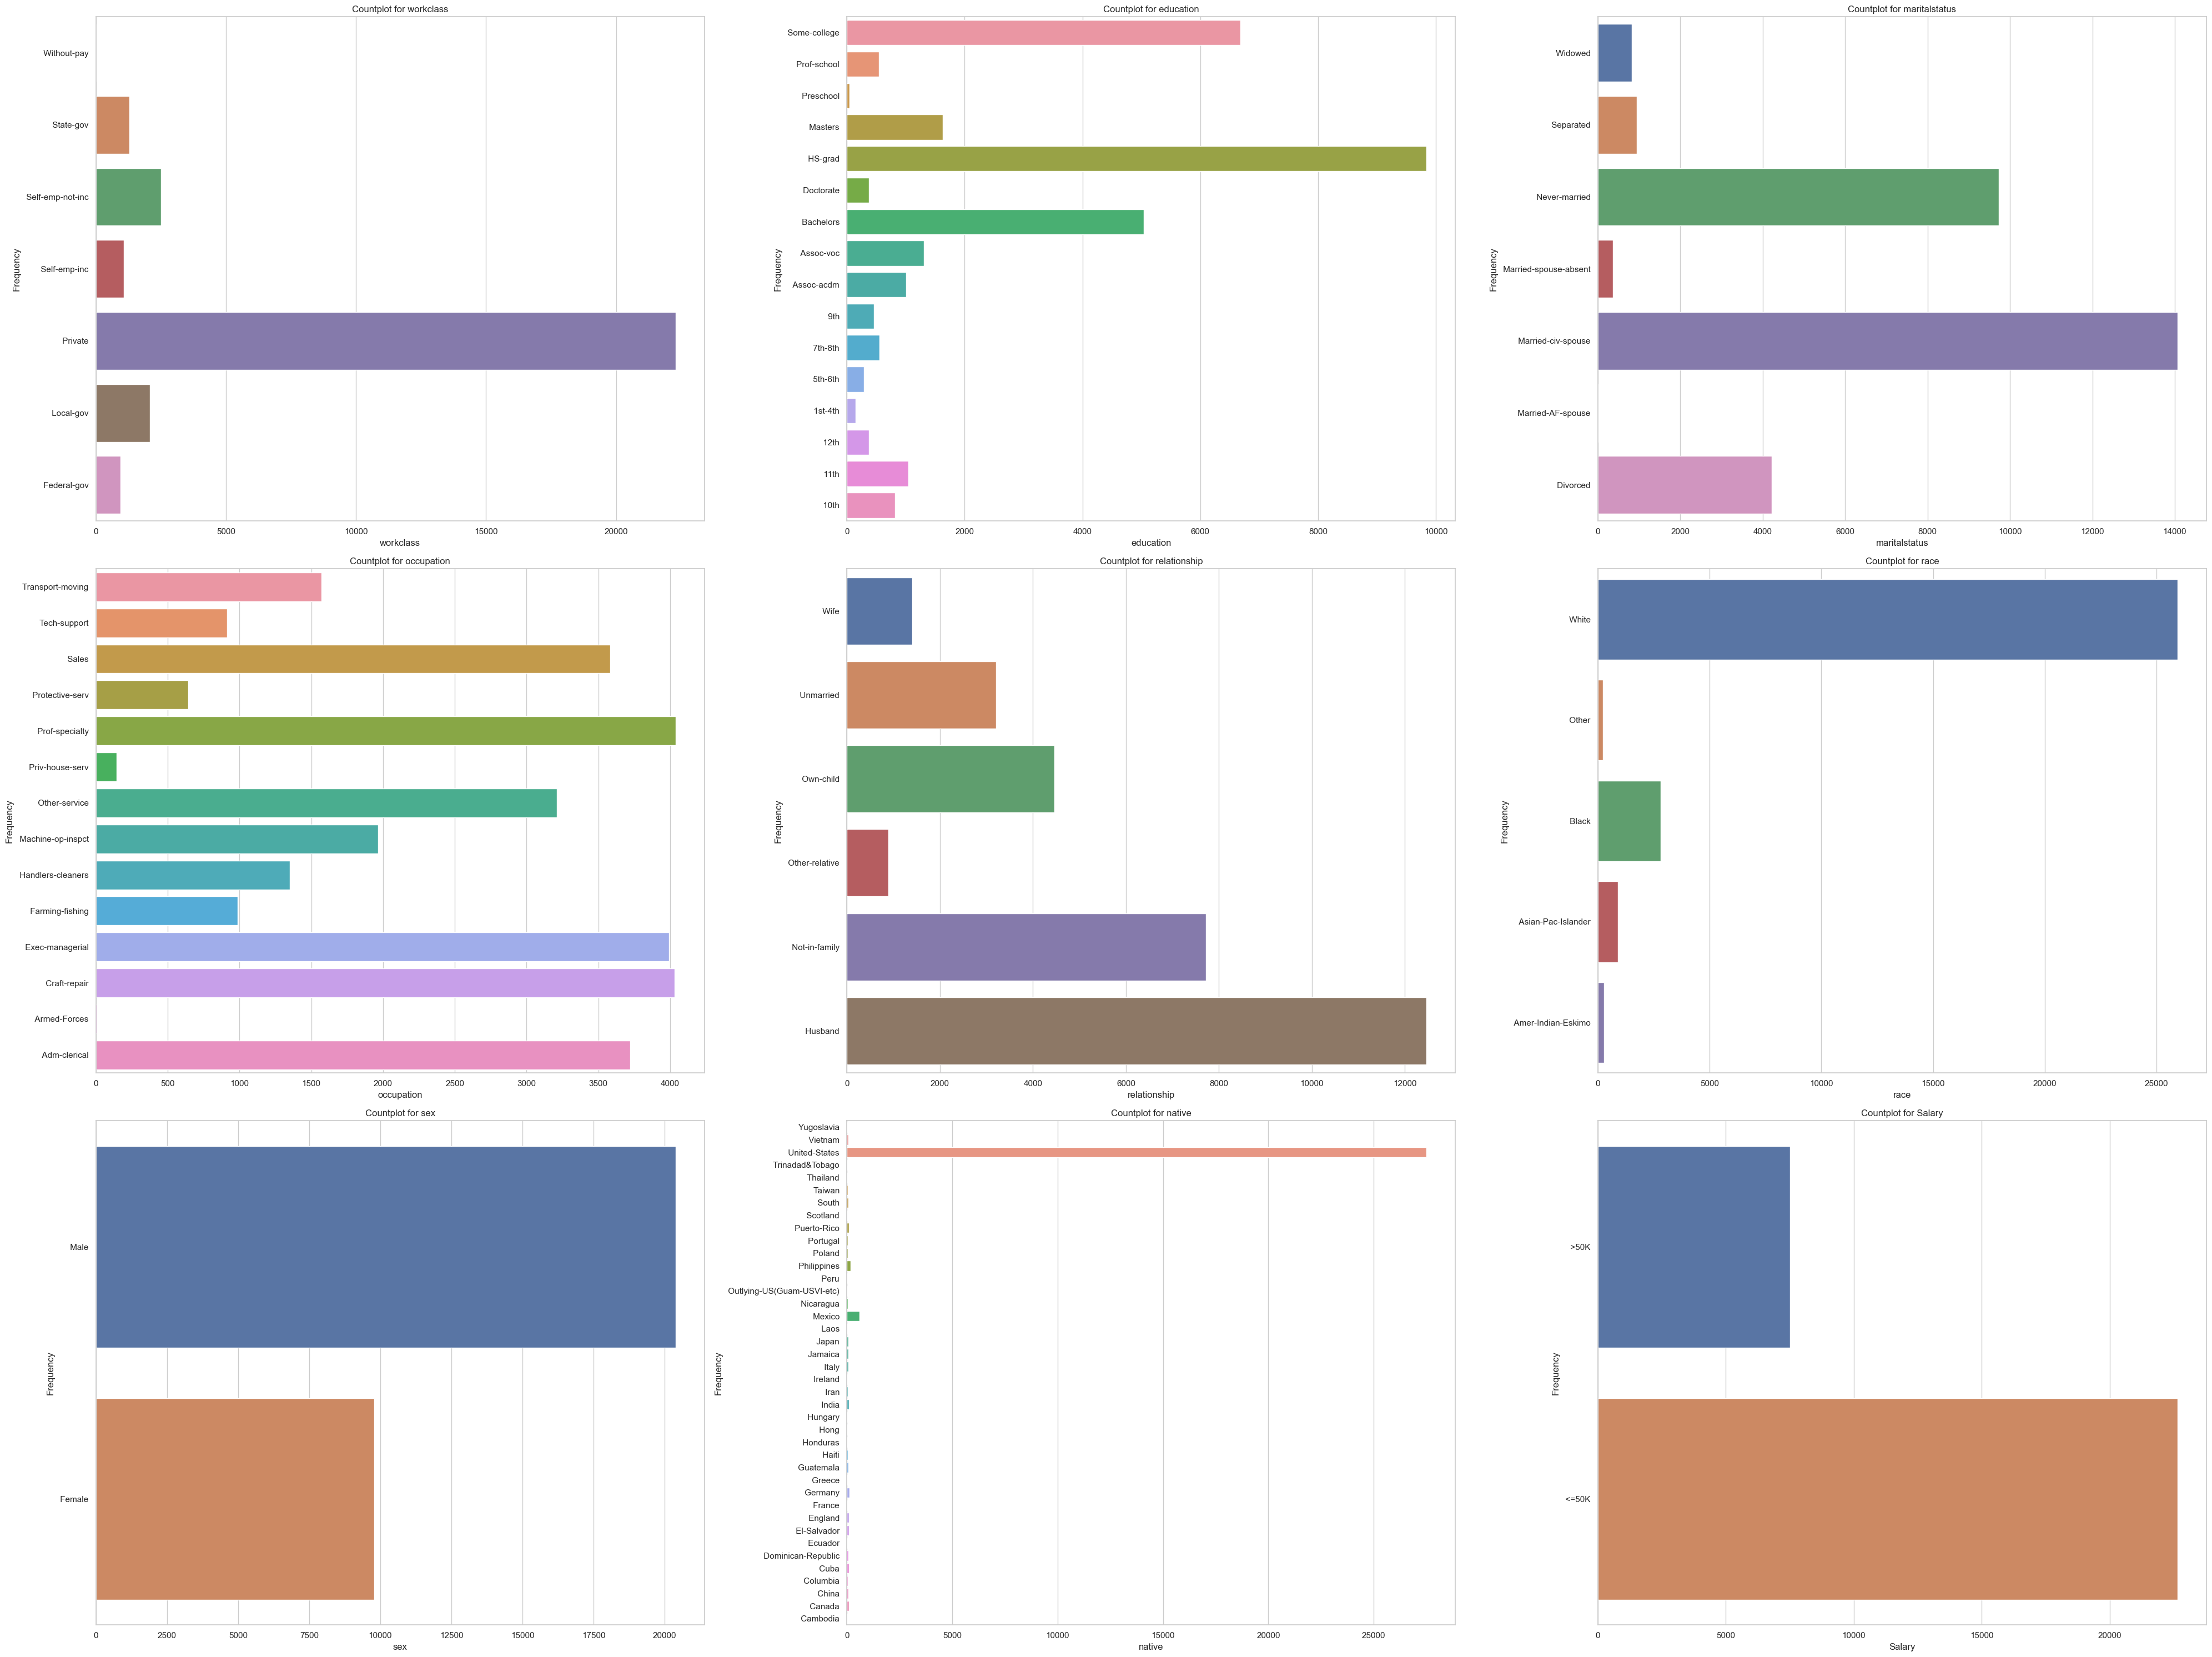

In [11]:
#Visualization of Train Data
d_v = train_data[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']]
plt.figure(figsize=(40,30))
for i , col in enumerate(d_v.columns,start=1):
    plt.subplot(3,3, i)
    sns.countplot(y=d_v[col].sort_values(ascending=False))
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

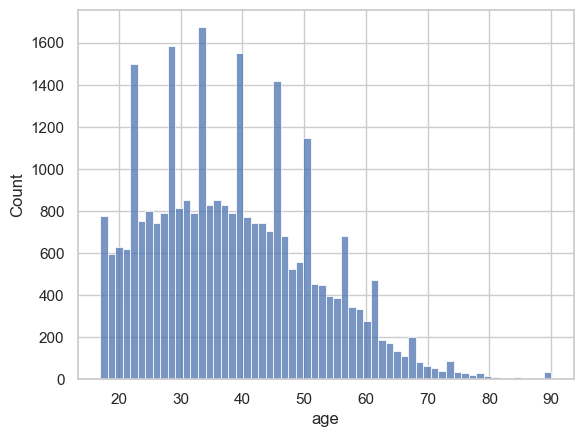

In [12]:
sns.histplot(train_data['age'].sort_values(ascending=True))

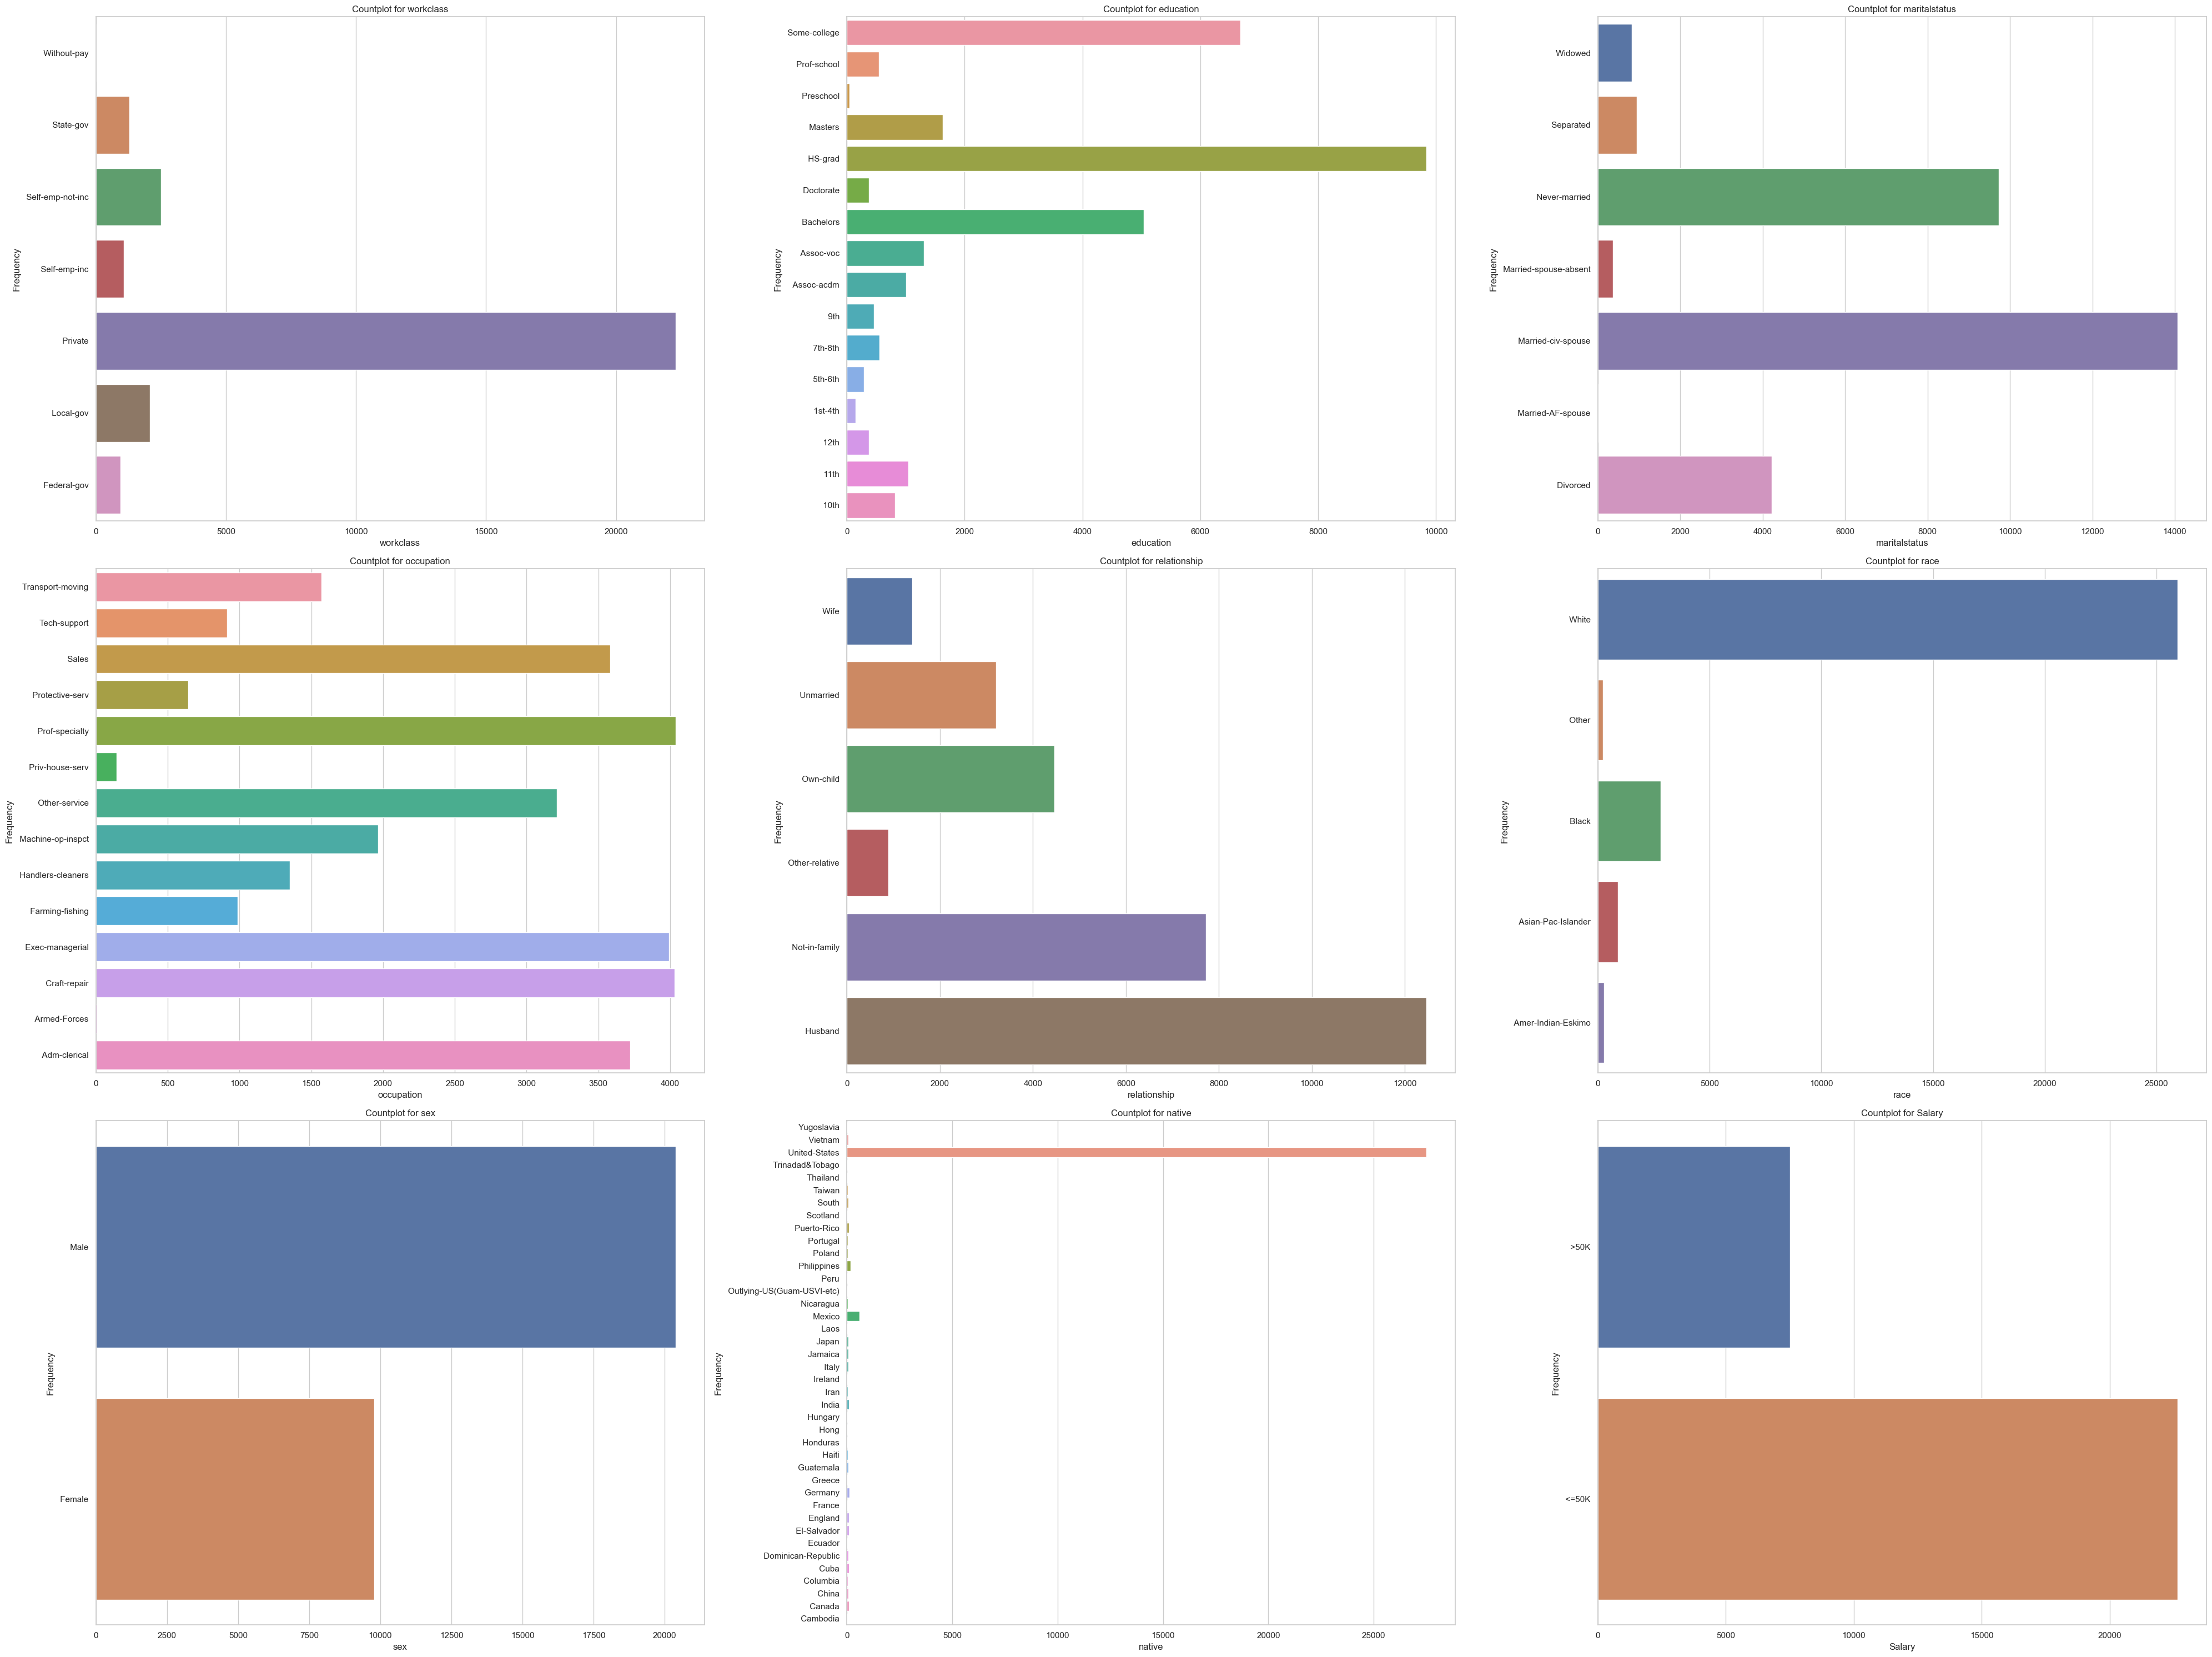

In [13]:
#Visualization of Test Data
d_v_2 = test_data[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']]
plt.figure(figsize=(40,30))
for i , col in enumerate(d_v_2.columns,start=1):
    plt.subplot(3,3, i)
    sns.countplot(y=d_v[col].sort_values(ascending=False))
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

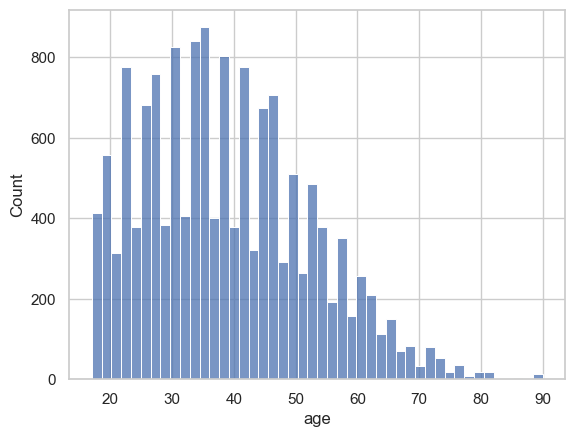

In [14]:
sns.histplot(test_data['age'].sort_values(ascending=True))

<b>DATA PREPROCESSING

In [15]:
#Since the column 'educationno' is not explaining anything in the let us drop it
train_data_2 = train_data.drop('educationno',axis=1)
test_data_2 = test_data.drop('educationno',axis=1)
print('Train Data Shape : ',train_data_2.shape)
print('Test Data Shape : ' ,test_data_2.shape)

Train Data Shape :  (30161, 13)
Test Data Shape :  (15060, 13)


In [16]:
train_data_3 = pd.get_dummies(train_data_2[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']])
test_data_3 = pd.get_dummies(test_data_2[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']])

In [17]:
train_data_4 = train_data_2.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1)
test_data_4 = test_data_2.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1)

In [18]:
train_data_5 = pd.concat([train_data_4,train_data_3],axis=1)
test_data_5 = pd.concat([test_data_4,test_data_3],axis=1)

In [19]:
train_data_5

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,0,0,38,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,0,0,40,>50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,0,0,20,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
test_data_5

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,>50K,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,>50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,0,30,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,0,0,36,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,0,0,50,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,5455,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<b>MODEL BUILDING

In [21]:
from sklearn.naive_bayes import CategoricalNB as CB
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
x_train = train_data_5.drop(['Salary'],axis=1)
y_train = train_data_5['Salary']
x_test = test_data_5.drop(['Salary'],axis=1)
y_test = test_data_5['Salary']
print('X Train Shape : ',x_train.shape)
print('Y Train Shape : ',y_train.shape)
print('X Test Shape : ',x_test.shape)
print('Y Test Shape : ',y_test.shape)

X Train Shape :  (30161, 101)
Y Train Shape :  (30161,)
X Test Shape :  (15060, 101)
Y Test Shape :  (15060,)


In [23]:
#Model 1 with CategoricalNB
model_1 = CB(alpha=True)
model_1.fit(x_train,y_train)
y_pred_1 = model_1.predict(x_test)
print(y_pred_1)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_1))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_1))

[' <=50K' ' >50K' ' >50K' ... ' >50K' ' <=50K' ' >50K']
Confusion_Matrix:  
 [[9498 1862]
 [ 893 2807]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.91      0.84      0.87     11360
        >50K       0.60      0.76      0.67      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.80      0.77     15060
weighted avg       0.84      0.82      0.82     15060



In [24]:
#Model 2 with MultinomialNB
model_2 = MB(alpha=True)
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print(y_pred_2)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_2))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_2))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']
Confusion_Matrix:  
 [[10891   469]
 [ 2920   780]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [25]:
#Model 3 with GaussianNB
model_3 = GB()
model_3.fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)
print(y_pred_3)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_3))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_3))

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' >50K' ' >50K']
Confusion_Matrix:  
 [[8896 2464]
 [ 671 3029]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85     11360
        >50K       0.55      0.82      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.80      0.75     15060
weighted avg       0.84      0.79      0.80     15060



<b> ClassificationNB gives better results out of all three models

<b>MODEL IMPROVEMENT

In [26]:
y_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [27]:
#Provided data is highly imbalenced let us resample the data

from imblearn.under_sampling import RandomUnderSampler

under_sampler=RandomUnderSampler(random_state=101)

x_train_2 , y_train_2 = under_sampler.fit_resample(x_train,y_train)
x_test_2 , y_test_2 = under_sampler.fit_resample(x_test,y_test)

In [28]:
y_train_2.value_counts()

 <=50K    7508
 >50K     7508
Name: Salary, dtype: int64

In [29]:
#let us build the model with ClassificationNB as it gave best results
#Model 4 with CategoricalNB
model_4 = CB(alpha=True)
model_4.fit(x_train_2,y_train_2)
y_pred_4 = model_1.predict(x_test_2)
print(y_pred_4)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test_2,y_pred_4))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test_2,y_pred_4))

[' <=50K' ' >50K' ' <=50K' ... ' >50K' ' >50K' ' >50K']
Confusion_Matrix:  
 [[3106  594]
 [ 893 2807]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.78      0.84      0.81      3700
        >50K       0.83      0.76      0.79      3700

    accuracy                           0.80      7400
   macro avg       0.80      0.80      0.80      7400
weighted avg       0.80      0.80      0.80      7400



<b>Eventhough the accuracy is decreasing but the minority class predictions are imporoving we can select Model 4 as our final model

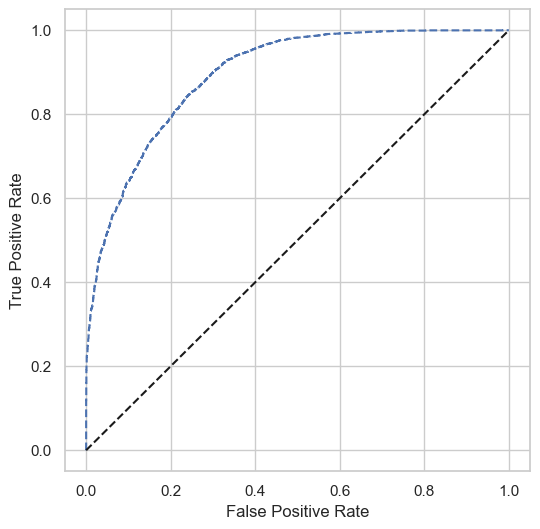

Area Under Curve =  0.799054054054054


In [30]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

y_t = LabelEncoder().fit_transform(y_test_2)
y_p = LabelEncoder().fit_transform(y_pred_4)

fpr,tpr,threshold = roc_curve(y_t,model_4.predict_proba(x_test_2)[:,1])
auc = roc_auc_score(y_t,y_p)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under Curve = ',auc)